<a href="https://colab.research.google.com/github/rahul-727/ML/blob/main/2348544_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
encoder = OneHotEncoder(sparse=False)
categorical_columns = ['customerID','gender', 'Partner', 'Dependents','PhoneService','MultipleLines',
                       'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
                       'TechSupport',	'StreamingTV','StreamingMovies','Contract','PaperlessBilling',
                       'PaymentMethod','Churn']
# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')

# Fit the encoder on the selected columns and transform the data
encoded_data = encoder.fit_transform(df[categorical_columns])

# Get the feature names for the one-hot encoded columns
encoded_feature_names = encoder.get_feature_names_out(input_features=categorical_columns)

# Create a DataFrame with the one-hot encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoded_feature_names)

# Drop the original categorical columns from the original DataFrame
df = df.drop(categorical_columns, axis=1)

# Concatenate the original DataFrame with the one-hot encoded DataFrame
df = pd.concat([df, encoded_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [10]:
blank_spaces_found = False

# Iterate through the DataFrame and check for blank spaces
for column in df.columns:
    for value in df[column]:
        if isinstance(value, str) and value.strip() == "":
            print(f"Blank space found in column '{column}': '{value}'")
            blank_spaces_found = True

# Check if any blank spaces were found
if blank_spaces_found:
    print("Blank spaces were found in the dataset.")
else:
    print("No blank spaces were found in the dataset.")

Blank space found in column 'TotalCharges': ' '
Blank space found in column 'TotalCharges': ' '
Blank space found in column 'TotalCharges': ' '
Blank space found in column 'TotalCharges': ' '
Blank space found in column 'TotalCharges': ' '
Blank space found in column 'TotalCharges': ' '
Blank space found in column 'TotalCharges': ' '
Blank space found in column 'TotalCharges': ' '
Blank space found in column 'TotalCharges': ' '
Blank space found in column 'TotalCharges': ' '
Blank space found in column 'TotalCharges': ' '
Blank spaces were found in the dataset.


In [11]:
df = df.replace(' ', pd.NA)
df = df.dropna()

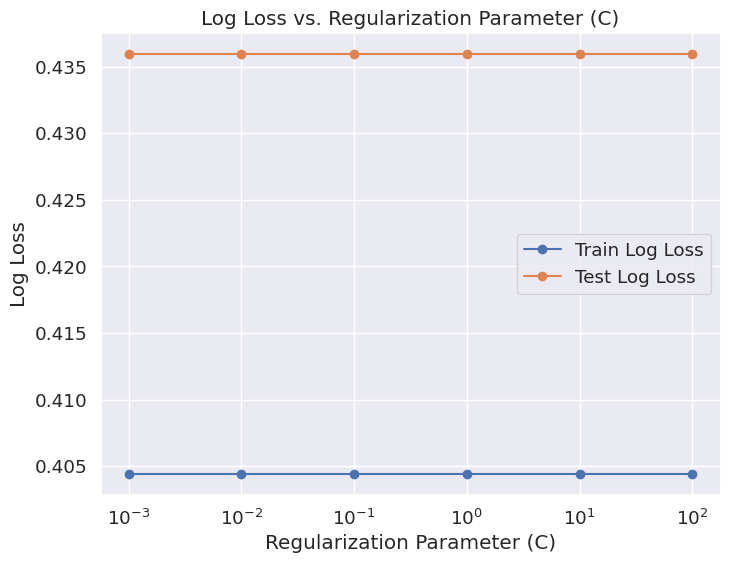

In [19]:
#Logistic regression
from sklearn.metrics import log_loss
X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_log_loss = []
test_log_loss = []

C_values = [0.001, 0.01, 0.1, 1, 10, 100]
for C in C_values:
  #buiding a baseine for logistic regression
  logistic_model = LogisticRegression(random_state=42,max_iter=1000)

  #Train the model on the training data
  logistic_model.fit(X_train, y_train)
  # Predict probabilities on both training and testing sets
  y_train_prob = logistic_model.predict_proba(X_train)[:, 1]
  y_test_prob = logistic_model.predict_proba(X_test)[:, 1]

  # Calculate log loss and append to the lists
  train_log_loss.append(log_loss(y_train, y_train_prob))
  test_log_loss.append(log_loss(y_test, y_test_prob))

# Plot the log loss curve
plt.figure(figsize=(8, 6))
plt.plot(C_values, train_log_loss, label='Train Log Loss', marker='o')
plt.plot(C_values, test_log_loss, label='Test Log Loss', marker='o')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Log Loss')
plt.title('Log Loss vs. Regularization Parameter (C)')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
#Model Evaluation and Visualization:
#Evaluate the model&#39;s performance on the testing data using the following metrics:
# Accuracy
# Precision
# Recall
# F1-score
# ROC AUC
# Cohen&#39;s Kappa Score
# Matthews Correlation Coefficient

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score, matthews_corrcoef
# Predict on the test set
y_pred = logistic_model.predict(X_test)
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)  # For binary classification, you can use y_pred directly
kappa = cohen_kappa_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print(f"Cohen's Kappa: {kappa:.2f}")
print(f"Matthews Correlation Coefficient: {mcc:.2f}")


Accuracy: 0.78
Precision: 0.61
Recall: 0.52
F1-score: 0.56
ROC AUC: 0.70
Cohen's Kappa: 0.42
Matthews Correlation Coefficient: 0.42


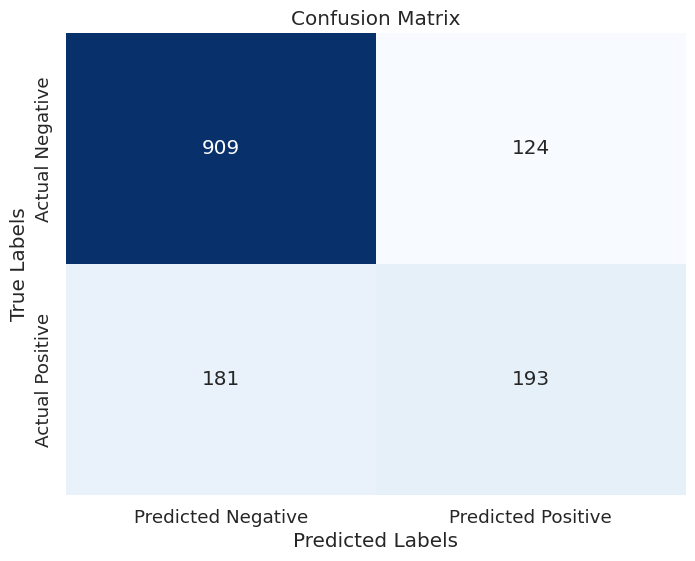

In [20]:
#Create a confusion matrix visualization.
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size if needed
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

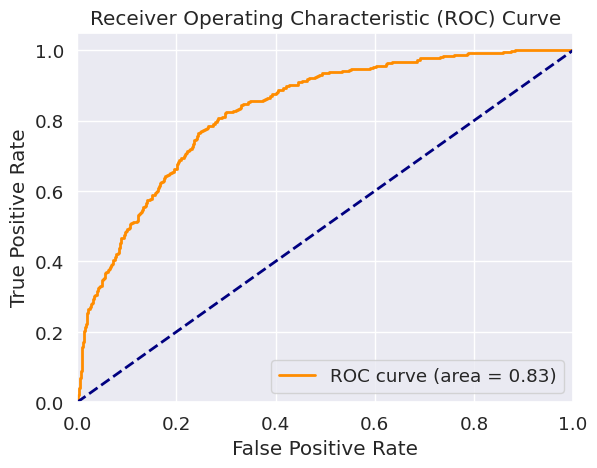

AUC: 0.83


In [22]:
#Plot the ROC curve and calculate the AUC.
# ROC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
# Print the AUC
print(f"AUC: {roc_auc:.2f}")

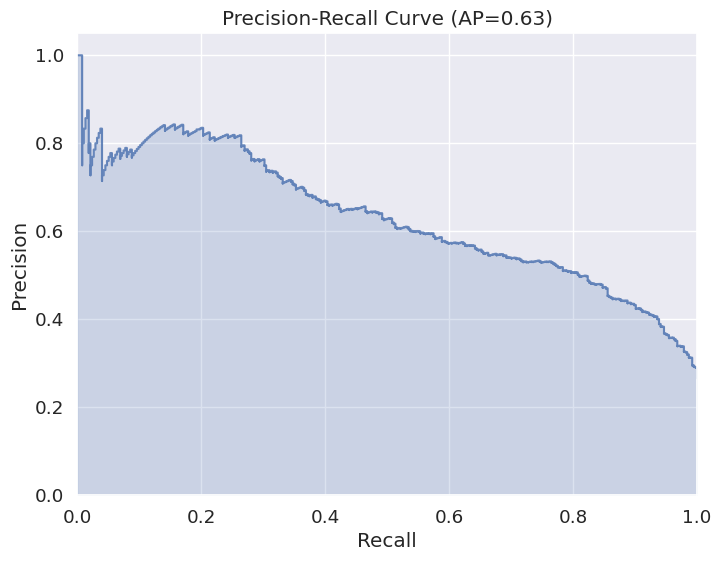

In [17]:
#Visualize the precision-recall curve.
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])
average_precision = average_precision_score(y_test, logistic_model.predict_proba(X_test)[:, 1])

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.8, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve (AP={0:.2f})'.format(average_precision))
plt.show()

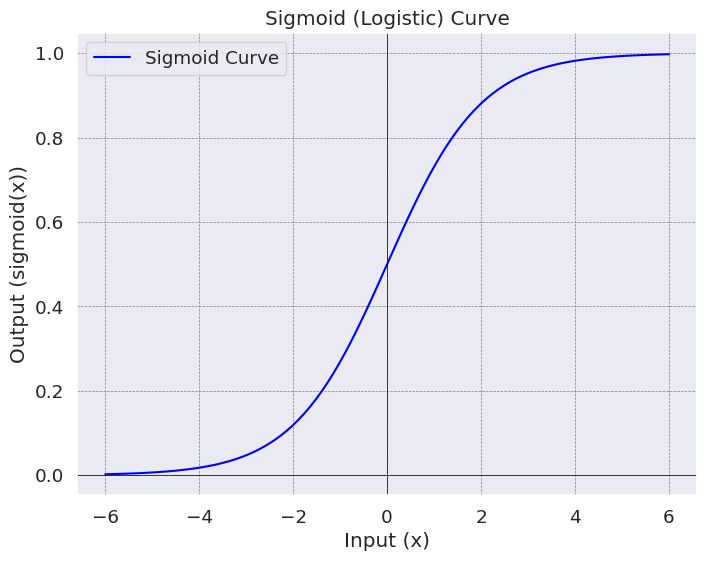

In [23]:
#4. Sigmoid Curve:
#a. Provide a clear visualization of the sigmoid (logistic) curve used in logistic regression.
#Explain its significance.
# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate a range of values from -6 to 6
x = np.linspace(-6, 6, 100)

# Calculate the sigmoid values for each x
y = sigmoid(x)

# Create a plot of the sigmoid curve
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Sigmoid Curve', color='blue')
plt.xlabel('Input (x)')
plt.ylabel('Output (sigmoid(x))')
plt.title('Sigmoid (Logistic) Curve')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

In [26]:
#5. Hyperparameter Tuning:
#a. Perform hyperparameter tuning to optimize the logistic regression model. Experiment with
#different values for at least one hyperparameter.
#b. Discuss how hyperparameter tuning affects the model&#39;s performance.
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Define a range of values for the regularization parameter C
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create a logistic regression model
logistic_model = LogisticRegression(random_state=42, max_iter=10000)

# Scale the features (optional but can help with convergence)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform grid search with cross-validation to find the best C value
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='neg_log_loss')
grid_search.fit(X_train_scaled, y_train)  # Use scaled data

# Get the best hyperparameter value
best_C = grid_search.best_params_['C']
print(f'Best C: {best_C}')

# Train a logistic regression model with the best C value using scaled data
best_logistic_model = LogisticRegression(C=best_C, random_state=42, max_iter=10000)  # Increase max_iter
best_logistic_model.fit(X_train_scaled, y_train)  # Use scaled data

# Evaluate the best model on the test set
y_pred_best = best_logistic_model.predict(X_test_scaled)


Best C: 0.01
